In [30]:
from datetime import datetime
import pandas as pd
from prophet import Prophet
import matplotlib as plt
from matplotlib import pyplot
import sys
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pandas import to_datetime
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import warnings
warnings.filterwarnings("ignore")
sys.path.insert(0, '/Users/koushikchennakesavan/Documents/EE364D/ml-covid-nba')
#may need to fix this with your FP to ml-covid-nba
from data.injury_labeller import injuryScore

In [31]:
scoreGen = injuryScore.injuryScore("embiijo01", 2019)
df = scoreGen.getInjuryScore()
df = df.dropna()
df = df[['Date', 'Injury and Fatigue Score']]

scoreGen = injuryScore.injuryScore("embiijo01", 2020)
df1 = scoreGen.getInjuryScore()
df1 = df1.dropna()
df1 = df1[['Date', 'Injury and Fatigue Score']]
df1 = df1[df1['Date'] < '2020-08-01']

scoreGen = injuryScore.injuryScore("embiijo01", 2021)
df2 = scoreGen.getInjuryScore()
df2 = df2.dropna()
df2 = df2[['Date', 'Injury and Fatigue Score']]

df = pd.concat([df, df1, df2])

In [32]:
scoreGen = injuryScore.injuryScore("embiijo01", 2022)
test = scoreGen.getInjuryScore()
test = test.dropna()
test = test[['Date', 'Injury and Fatigue Score']]
test.columns = ['ds', 'y']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.87689
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       387.175   0.000134198        79.759           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       387.181   1.10256e-08       63.7666       0.344       0.344      227   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


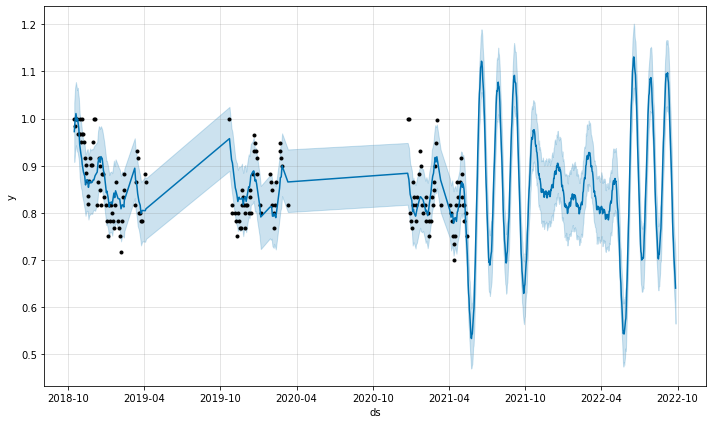

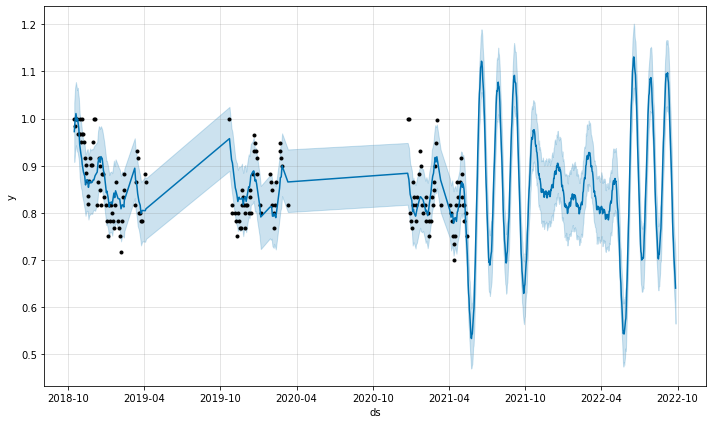

In [33]:
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
model = Prophet(seasonality_mode="multiplicative")
model.fit(df)
future_days = model.make_future_dataframe(periods=500)
future_predict = model.predict(future_days)
model.plot(future_predict, uncertainty=True)

In [34]:
future_predict = future_predict[['ds', 'yhat']]
future_predict = future_predict[future_predict['ds'].isin(test['ds'])]
#print(test)
#print(future_predict)
print(mean_squared_error(test['y'], future_predict['yhat'], squared=True))
print(r2_score(test['y'], future_predict['yhat']))
print(mean_absolute_error(test['y'], future_predict['yhat']))

0.004426199084084395
0.4234486784238687
0.0504459111046128


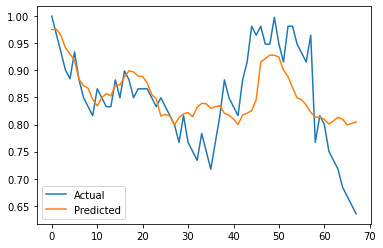

In [35]:
pyplot.plot(test['y'].values, label='Actual')
pyplot.plot(future_predict['yhat'].values, label='Predicted')
pyplot.legend()
pyplot.show()